In [2]:
# Крок 1: Завантаження даних
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
df = pd.read_csv('facebook_ads_data (2.0).csv')
df

,ad_date,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
0,2022-11-05,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
1,2022-11-01,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
2,2022-10-31,Expansion,227.45,6054,58,191.87,3.92,37.57,0.009580,0.843570
3,2022-10-30,Expansion,335.91,27562,69,472.61,4.87,12.19,0.002503,1.406954
4,2022-10-29,Expansion,714.03,33358,115,680.34,6.21,21.41,0.003447,0.952817
...,...,...,...,...,...,...,...,...,...,...
1489,2020-11-15,Discounts,6.98,12465,657,10.96,0.01,0.56,0.052708,1.570201
1490,2020-11-14,Discounts,7.27,5005,392,12.67,0.02,1.45,0.078322,1.742779
1491,2020-11-13,Discounts,6.36,11669,451,9.77,0.01,0.55,0.038649,1.536164
1492,2020-11-12,Discounts,23.00,10473,397,21.13,0.06,2.20,0.037907,0.918696


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ad_date            1494 non-null   object 
 1   campaign_name      1494 non-null   object 
 2   total_spend        1494 non-null   float64
 3   total_impressions  1494 non-null   int64  
 4   total_clicks       1494 non-null   int64  
 5   total_value        1494 non-null   float64
 6   cpc                1443 non-null   float64
 7   cpm                1462 non-null   float64
 8   ctr                1462 non-null   float64
 9   romi               1462 non-null   float64
dtypes: float64(6), int64(2), object(2)
memory usage: 116.8+ KB


In [13]:
df.describe( include = 'all')

,ad_date,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
count,1494,1494,1494.000000,1494.000000,1494.000000,1494.000000,1443.000000,1462.000000,1462.000000,1462.000000
unique,547,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2021-08-06,Lookalike,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,7,235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,131.035964,34190.182062,318.840696,165.457450,0.814712,5.085677,0.011947,1.326322
std,NaN,NaN,214.968986,44433.507387,485.663099,274.764573,1.705224,8.107076,0.013192,0.343012
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000,0.050000,0.000000,0.751445
25%,NaN,NaN,18.047500,8377.000000,62.250000,24.350000,0.170000,1.500000,0.004462,1.067832
50%,NaN,NaN,48.515000,15983.000000,148.000000,65.460000,0.350000,2.775000,0.007845,1.299482
75%,NaN,NaN,161.790000,45849.750000,371.750000,196.595000,0.765000,5.275000,0.015005,1.527423


In [19]:
# Крок 2: Групування даних по дням і побудова графіків
#Фільтрування за 2021 рік
# Переконаємося, що колонки з датами у форматі datetime
df['ad_date'] = pd.to_datetime(df['ad_date'], errors='coerce')
# Фільтруємо дані тільки за 2021 рік
df_2021 = df[df['ad_date'].dt.year == 2021]
# Перевірка
df_2021

,ad_date,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
274,2021-12-31,Lookalike,143.19,24699,194,138.86,0.74,5.80,0.007855,0.969760
275,2021-12-31,Trendy,8.82,25345,63,16.32,0.14,0.35,0.002486,1.850340
276,2021-12-31,Wholesale,21.37,6705,24,27.93,0.89,3.19,0.003579,1.306972
277,2021-12-30,Lookalike,227.56,44527,897,243.02,0.25,5.11,0.020145,1.067938
278,2021-12-30,Trendy,31.92,8833,58,63.67,0.55,3.61,0.006566,1.994674
...,...,...,...,...,...,...,...,...,...,...
1436,2021-01-05,Discounts,81.15,60232,1379,61.68,0.06,1.35,0.022895,0.760074
1437,2021-01-04,Discounts,70.06,22440,1256,68.47,0.06,3.12,0.055971,0.977305
1438,2021-01-02,Discounts,7.74,10709,205,6.90,0.04,0.72,0.019143,0.891473
1439,2021-01-01,Brand,0.39,353,0,0.59,NaN,1.10,0.000000,1.512821


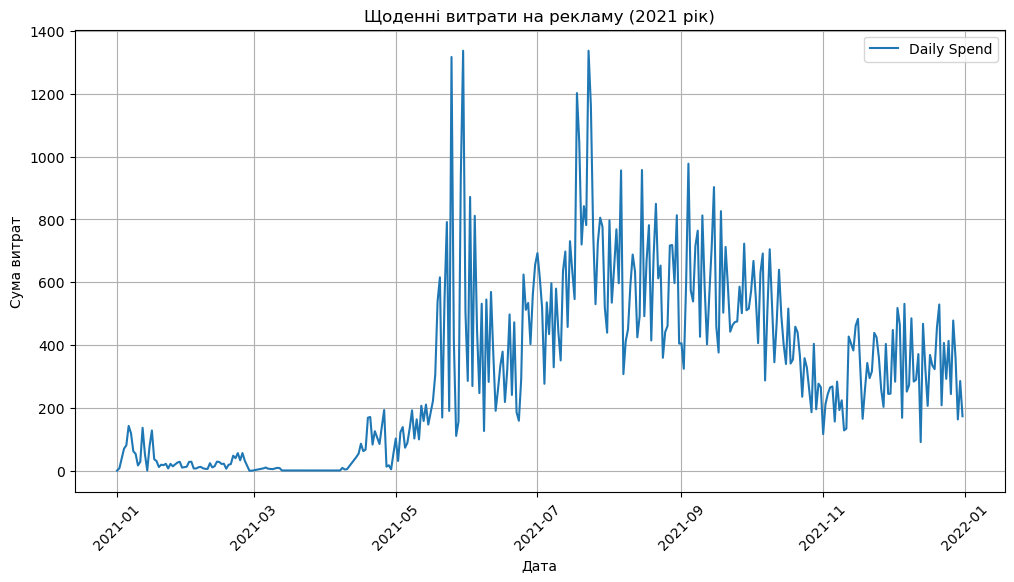

In [21]:
# Графік щоденної суми витрат на рекламу
# Групування за днями
daily_spend = df_2021.groupby('ad_date')['total_spend'].sum().reset_index()
# Побудова графіка
plt.figure(figsize=(12, 6))
plt.plot(daily_spend['ad_date'], daily_spend['total_spend'], label='Daily Spend')
plt.title('Щоденні витрати на рекламу (2021 рік)')
plt.xlabel('Дата')
plt.ylabel('Сума витрат')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.show()

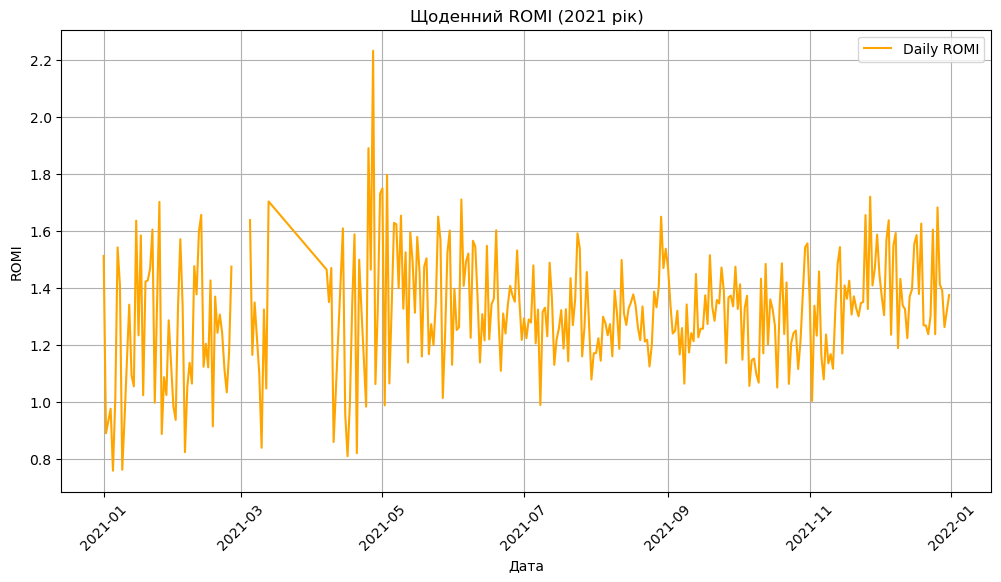

In [25]:
#Графік щоденного ROMI
# Додавання колонки ROMI (Return on Marketing Investment)
df_2021.loc[:, 'ROMI'] = df_2021['total_value'] / df_2021['total_spend']
# Групування за днями
daily_romi = df_2021.groupby('ad_date')['ROMI'].mean().reset_index()
# Побудова графіка
plt.figure(figsize=(12, 6))
plt.plot(daily_romi['ad_date'], daily_romi['ROMI'], label='Daily ROMI', color='orange')
plt.title('Щоденний ROMI (2021 рік)')
plt.xlabel('Дата')
plt.ylabel('ROMI')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.show()


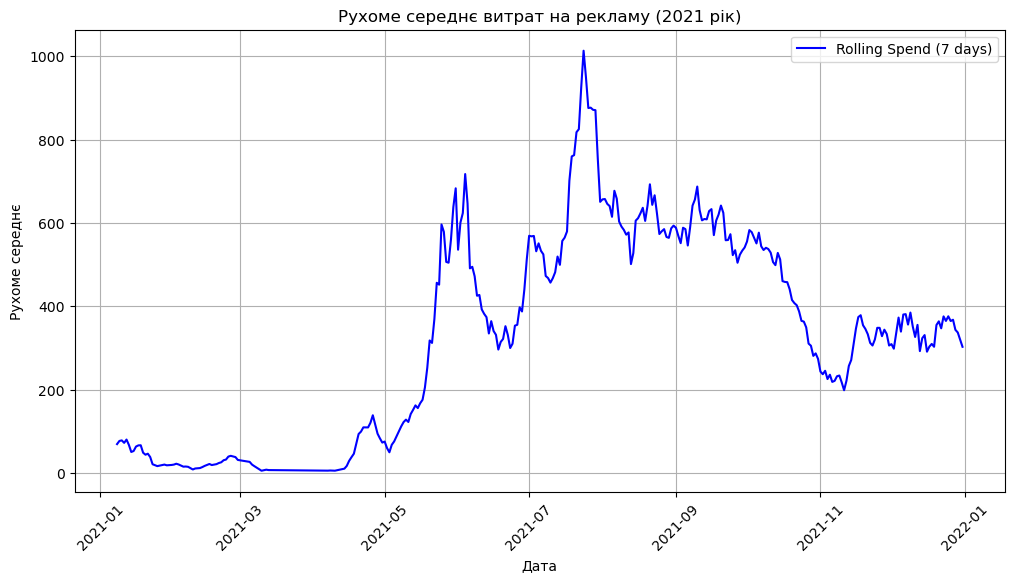

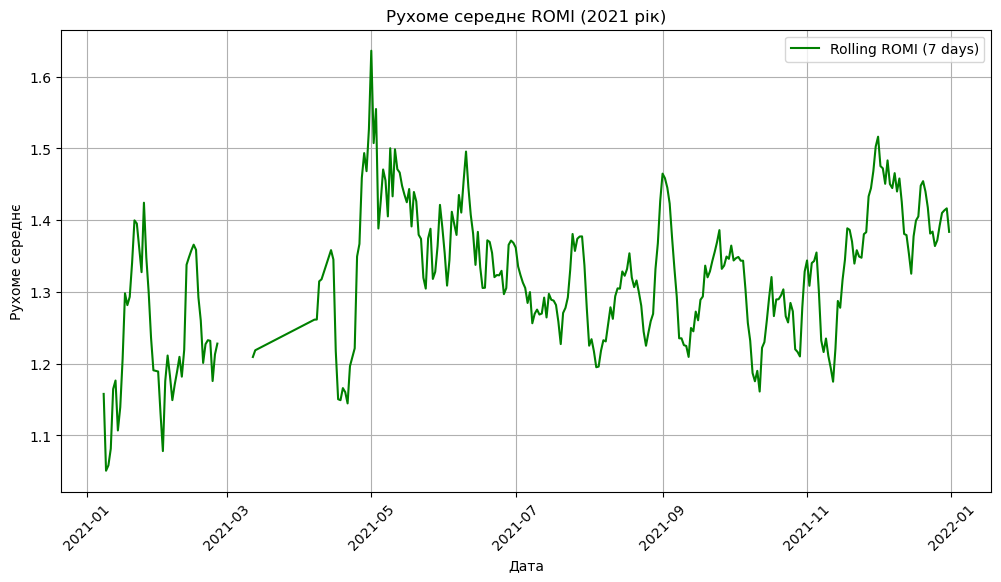

In [31]:
# Додавання рухомого середнього
daily_spend['rolling_spend'] = daily_spend['total_spend'].rolling(window=7).mean()
daily_romi['rolling_romi'] = daily_romi['ROMI'].rolling(window=7).mean()

# Побудова графіків
plt.figure(figsize=(12, 6))
plt.plot(daily_spend['ad_date'], daily_spend['rolling_spend'], label='Rolling Spend (7 days)', color='blue')
plt.title('Рухоме середнє витрат на рекламу (2021 рік)')
plt.xlabel('Дата')
plt.ylabel('Рухоме середнє')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(daily_romi['ad_date'], daily_romi['rolling_romi'], label='Rolling ROMI (7 days)', color='green')
plt.title('Рухоме середнє ROMI (2021 рік)')
plt.xlabel('Дата')
plt.ylabel('Рухоме середнє')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.show()

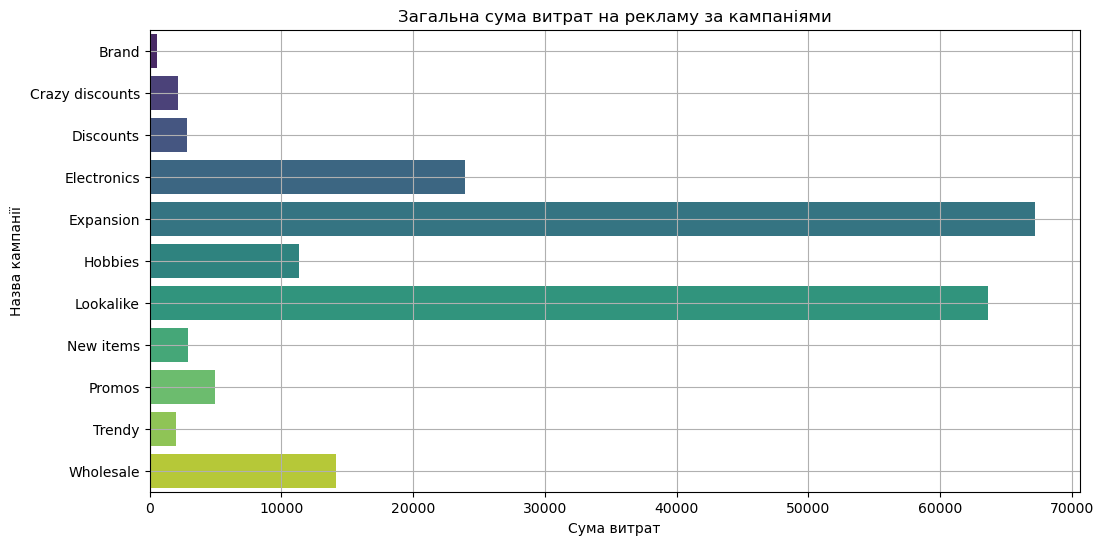

In [37]:
#Крок 3: Групування даних за назвою кампанії
#Графік загальної суми витрат на рекламу в кожній кампанії
# Групування за назвою кампанії
campaign_spend = df.groupby('campaign_name')['total_spend'].sum().reset_index()

# Побудова графіка
plt.figure(figsize=(12, 6))
sns.barplot(
    x='total_spend',
    y='campaign_name',
    data=campaign_spend,
    hue='campaign_name',
    palette='viridis',
    dodge=False  # Убираем смещение столбцов
)
plt.title('Загальна сума витрат на рекламу за кампаніями')
plt.xlabel('Сума витрат')
plt.ylabel('Назва кампанії')
plt.grid()
plt.show()

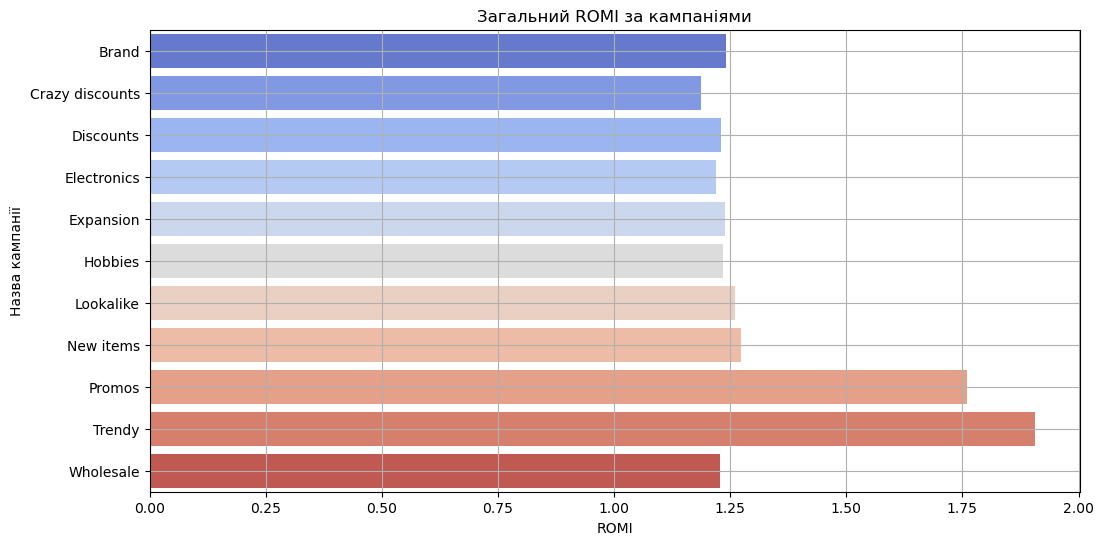

In [45]:
#Графік загального ROMI в кожній кампанії
# Групування за назвою кампанії
campaign_romi = df.groupby('campaign_name').agg(
    ROMI=('total_value', 'sum'),
    total_spend=('total_spend', 'sum')
).reset_index()

# Теперь можно вычислить ROMI
campaign_romi['ROMI'] = campaign_romi['ROMI'] / campaign_romi['total_spend']

# Побудова графіка
plt.figure(figsize=(12, 6))
sns.barplot(
    x='ROMI',
    y='campaign_name',
    data=campaign_romi,
    palette='coolwarm',
    hue='campaign_name'
)
plt.title('Загальний ROMI за кампаніями')
plt.xlabel('ROMI')
plt.ylabel('Назва кампанії')
plt.grid()
plt.show()

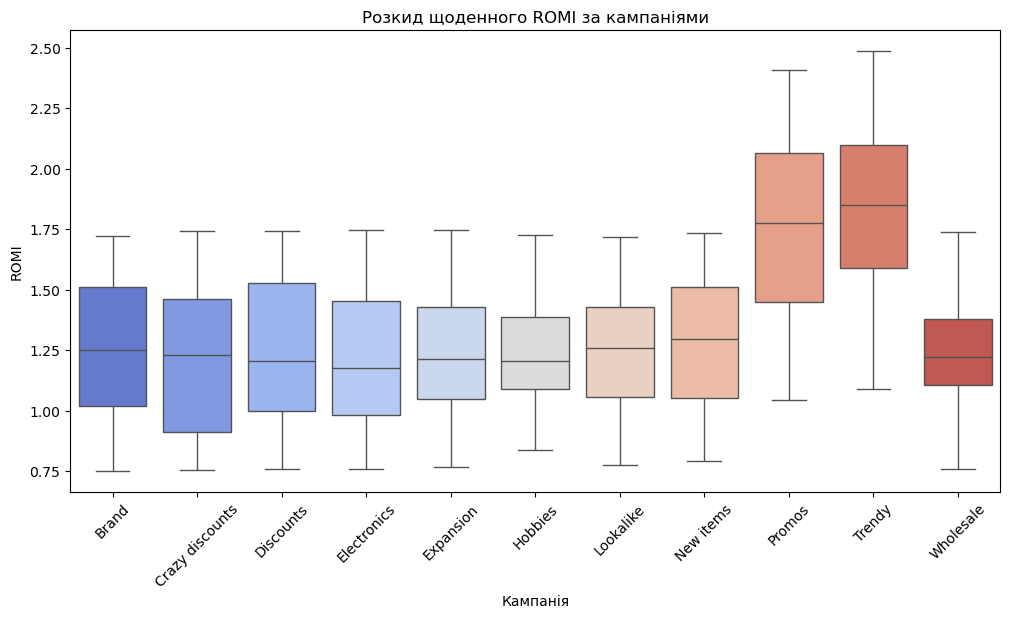

In [59]:
# Крок 4: Box Plot для щоденного ROMI
# Групування за кампаніями
daily_campaign_romi = df.groupby(['campaign_name', 'ad_date'])['romi'].mean().reset_index()

# Побудова Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='campaign_name', y='romi', data=daily_campaign_romi, hue='campaign_name', palette='coolwarm')
plt.title('Розкид щоденного ROMI за кампаніями')
plt.xlabel('Кампанія')
plt.ylabel('ROMI')
plt.xticks(rotation=45)
plt.show()

In [49]:
print(df.columns)

Index(['ad_date', 'campaign_name', 'total_spend', 'total_impressions',
       'total_clicks', 'total_value', 'cpc', 'cpm', 'ctr', 'romi'],
      dtype='object')


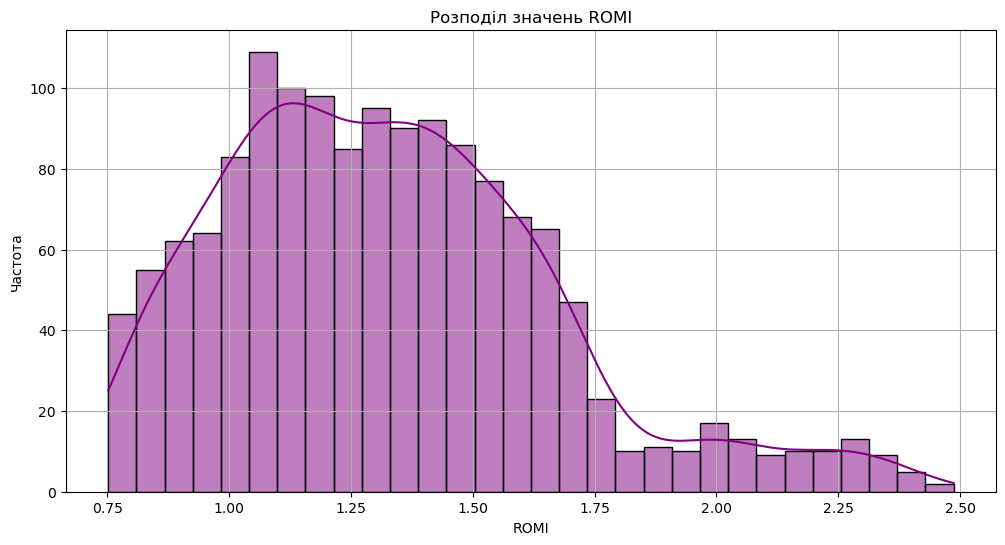

In [61]:
# Крок 5: Гістограма ROMI
plt.figure(figsize=(12, 6))
sns.histplot(df['romi'], bins=30, kde=True, color='purple')
plt.title('Розподіл значень ROMI')
plt.xlabel('ROMI')
plt.ylabel('Частота')
plt.grid()
plt.show()

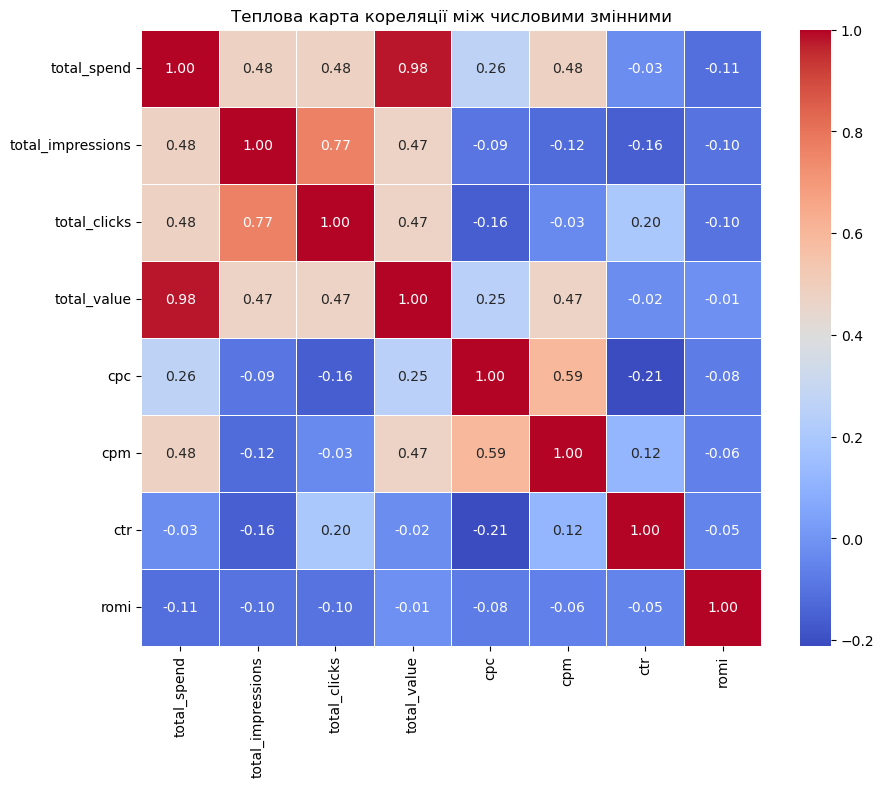

total_value          1.000000
total_spend          0.978890
total_clicks         0.472124
total_impressions    0.472037
cpm                  0.471338
cpc                  0.250851
romi                -0.013733
ctr                 -0.022267
Name: total_value, dtype: float64


In [69]:
# Крок 6: Теплова карта кореляції
# Явно вибираємо числові стовпці для кореляції
df_numeric = df[['total_spend', 'total_impressions', 'total_clicks', 'total_value', 'cpc', 'cpm', 'ctr', 'romi']]

# Обчислення кореляції
corr = df_numeric.corr()

# Побудова теплової карти
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Теплова карта кореляції між числовими змінними')
plt.show()
# Визначення найбільшої/найменшої кореляції
print(corr['total_value'].sort_values(ascending=False))

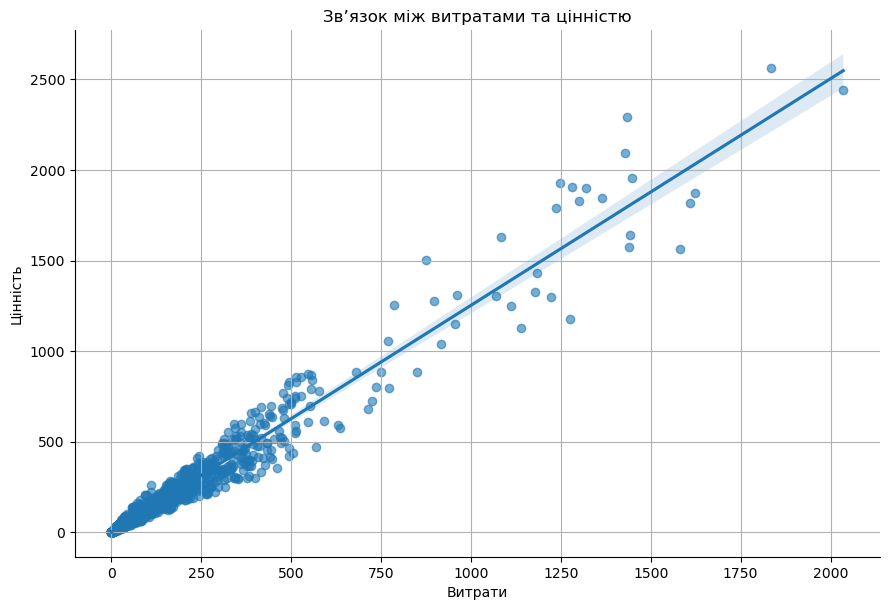

In [71]:
# Крок 7: Точкова діаграма з регресією
sns.lmplot(x='total_spend', y='total_value', data=df, height=6, aspect=1.5, scatter_kws={'alpha':0.6})
plt.title('Звʼязок між витратами та цінністю')
plt.xlabel('Витрати')
plt.ylabel('Цінність')
plt.grid()
plt.show()